# 📊 YOLO Benchmark Analysis - Quantization Impact Study

## 📚 Import Required Libraries

In [ ]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 📊 Load Benchmark Results

In [2]:
# Load the benchmark results
df = pd.read_csv('runs/benchmark_results.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")

print("\nFirst few rows:")
df.head()

Dataset Overview:
Shape: (18, 11)

First few rows:


,Experiment,Dataset,Freeze,Quantization,Half_Precision,INT8,Model_Size_MB,mAP50,mAP50-95,Inference_Time_ms,FPS
0,BloodCell_freeze_10,BloodCell,Frozen,FP16,True,False,5.2,0.974,0.905,33.73,29.65
1,BloodCell_freeze_10,BloodCell,Frozen,FP32,False,False,5.2,0.974,0.905,33.88,29.51
2,BloodCell_freeze_10,BloodCell,Frozen,INT8,False,True,5.2,0.974,0.905,32.98,30.32
3,BloodCell_unfrozen,BloodCell,Unfrozen,FP16,True,False,5.2,0.980,0.919,33.79,29.59
4,BloodCell_unfrozen,BloodCell,Unfrozen,FP32,False,False,5.2,0.980,0.919,32.77,30.52


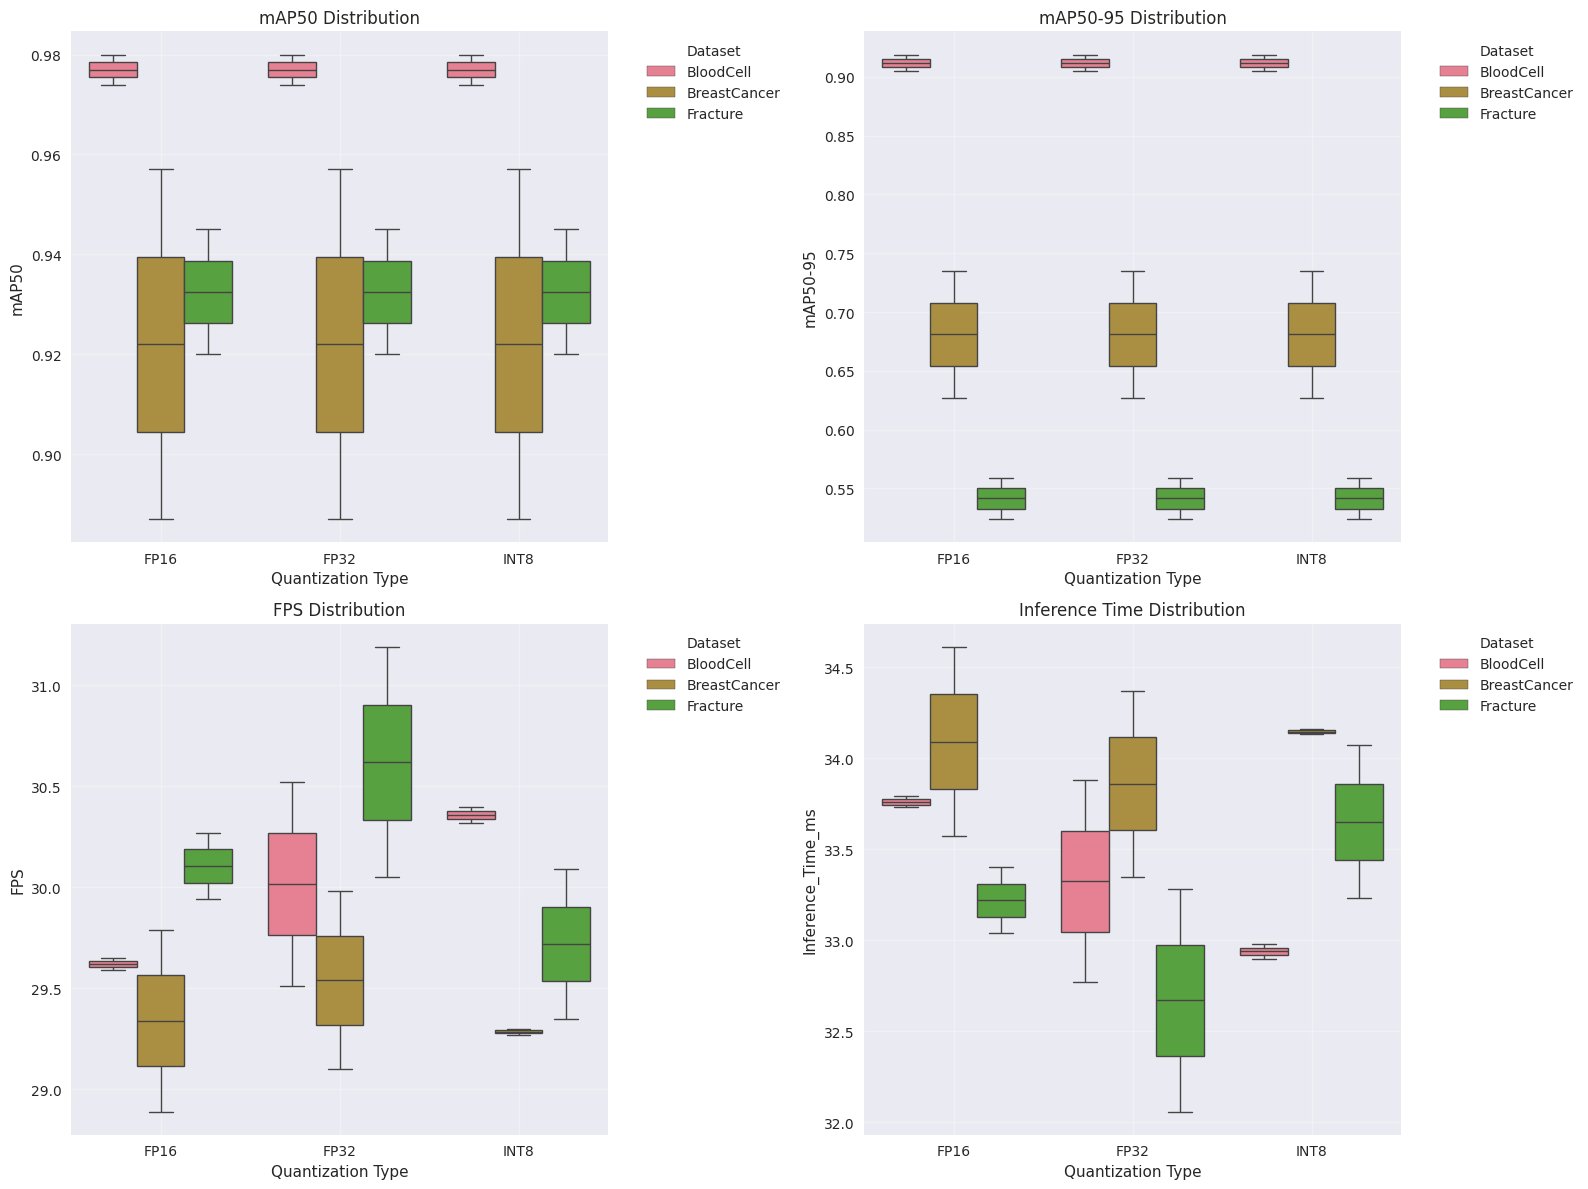

In [ ]:
# Set up the figure with subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Metrics to plot
metrics = ['mAP50', 'mAP50-95', 'FPS', 'Inference_Time_ms']
titles = ['mAP50 Distribution', 'mAP50-95 Distribution', 'FPS Distribution', 'Inference Time Distribution']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    sns.boxplot(data=df, x='Quantization', y=metric, hue='Dataset', ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel('Quantization Type')
    axes[i].set_ylabel(metric)
    axes[i].legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 📈 Statistical Tests: Checking for Significant Differences

In [ ]:
print("=== ANOVA Tests for Differences Across Quantization Types ===\n")

# Metrics to test
metrics = ['mAP50', 'mAP50-95', 'FPS', 'Inference_Time_ms']

for metric in metrics:
    groups = [df[df['Quantization'] == quant][metric] for quant in df['Quantization'].unique()]

    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*groups)

    print(f"{metric}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  → Significant differences found between quantization types")
    else:
        print("  → No significant differences found between quantization types")
    print()

print("=== Pairwise t-tests (FP32 vs others) ===\n")

# Compare each quantization to FP32 (baseline)
fp32_data = df[df['Quantization'] == 'FP32']

for quant in df['Quantization'].unique():
    if quant == 'FP32':
        continue

    quant_data = df[df['Quantization'] == quant]

    print(f"FP32 vs {quant}:")

    for metric in metrics:
        t_stat, p_value = stats.ttest_ind(fp32_data[metric], quant_data[metric])

        print(f"  {metric}: t={t_stat:.4f}, p={p_value:.4f}")
        if p_value < 0.05:
            print("    → Significant difference")
        else:
            print("    → No significant difference")
    print()

=== ANOVA Tests for Differences Across Quantization Types ===

mAP50:
  F-statistic: 0.0000
  p-value: 1.0000
  → No significant differences found between quantization types

mAP50-95:
  F-statistic: 0.0000
  p-value: 1.0000
  → No significant differences found between quantization types

FPS:
  F-statistic: 0.6308
  p-value: 0.5457
  → No significant differences found between quantization types

Inference_Time_ms:
  F-statistic: 0.6055
  p-value: 0.5586
  → No significant differences found between quantization types

=== Pairwise t-tests (FP32 vs others) ===

FP32 vs FP16:
  mAP50: t=0.0000, p=1.0000
    → No significant difference
  mAP50-95: t=0.0000, p=1.0000
    → No significant difference
  FPS: t=1.0424, p=0.3218
    → No significant difference
  Inference_Time_ms: t=-1.0254, p=0.3294
    → No significant difference

FP32 vs INT8:
  mAP50: t=0.0000, p=1.0000
    → No significant difference
  mAP50-95: t=0.0000, p=1.0000
    → No significant difference
  FPS: t=0.7245, p=0.4853
 